In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import random
from numpy import inf
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import binom


class solvingMaze:
    import matplotlib.pyplot as plt
    def showmatrix(self, numberofRows):
        self.numberofRows = numberofRows
        
        #data = np.random.seed(numberofRows)
        data = np.random.randint(numberofRows, size = (numberofRows,numberofRows))
        #Keep the numbers constant

        print("visualize matrix with Random Number",data)
        fig, ax = plt.subplots()
        # Using matshow here just because it sets the ticks up nicely. imshow is faster.
        ax.matshow(data, cmap=mpl.colors.ListedColormap(['white','grey',"silver"]))

        for (i, j), z in np.ndenumerate(data):
            ax.text(j, i, '{:d}'.format(z), ha='center', va='center')

        plt.show()
        return data, numberofRows
   

    def visualizepath(self, path):
        fig, ax = plt.subplots()
        # Using matshow here just because it sets the ticks up nicely. imshow is faster.
        ax.matshow(path, cmap=mpl.colors.ListedColormap(['white','grey']))

        for (i, j), z in np.ndenumerate(path):
            ax.text(j, i, '{:d}'.format(z), ha='center', va='center')

        plt.show()






        



class Heuristic:
    def heuristicpath(self,data,numberofRows,modeofGame):

        

        path = np.zeros((numberofRows,numberofRows), dtype = np.int8)
        x,y = (0,0)

        cost = 0
        # we cover 2n-1 cell
        if modeofGame == 1:
            for i in range((2 * numberofRows) - 1):
                path[x][y] = 1
                cost = cost + data[x][y]
                if x < numberofRows - 1  and y < numberofRows - 1 :
                    if abs(data[x + 1][y]) <= abs(data[x][y + 1]):
                        x = x + 1
                    else :
                        y = y + 1
                elif x == numberofRows - 1 and y != numberofRows - 1 :
                        y = y + 1

                elif y == numberofRows - 1 and x != numberofRows -1 :
                        x = x + 1
        else:
            for i in range(2 * numberofRows -1 ):
                path[x][y] = 1
                xpre = x
                ypre = y
                if x < numberofRows - 1  and y < numberofRows - 1 :
                    if abs(data[x + 1][y]  - data[x][y]) <= abs(data[x][y + 1] - data[x][y]):
                        x = x + 1
                    else :
                        y = y + 1
                elif x == numberofRows - 1 and y != numberofRows - 1:
                        y = y + 1

                elif y == numberofRows- 1 and x != numberofRows - 1 :
                        x = x + 1
                cost = cost + abs(data[xpre][ypre] - data[x][y])

                    
       # print(cost)
       # 
        #print("Cost",cost)
        return path,cost
        
    
        
        
    



class Dijikstra: 
    
    def dijkstrapath(self , matrixcomponent, numberofRows,modeofGame):
            graph = {}
            matrix = matrixcomponent
            costs = {}
            if modeofGame == 1:
                for x in range(numberofRows):
                    for y in range(numberofRows):
                            xm1 = x - 1
                            ym1 = y - 1
                            xp1 = x + 1
                            yp1 = y + 1
                            costs[str(x) + str(y)] = inf
                            graph[str(x) + str(y)] = {}
                            above = np.array((xm1, y)) if xm1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(above[0]) == False:
                                graph[str(x) + str(y)][str(xm1) + str(y)] = matrix[xm1][y]
                            below = np.array((xp1, y)) if xp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(below[0]) == False:
                                graph[str(x) + str(y)][str(xp1) + str(y)] = matrix[xp1][y]
                            left = np.array((x, ym1)) if ym1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(left[0]) == False :
                                graph[str(x) + str(y)][str(x) + str(ym1)] = matrix[x][ym1]
                            right = np.array((x, yp1)) if yp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(right[0]) == False:
                                graph[str(x) + str(y)][str(x) + str(yp1)] = matrix[x][yp1]
            else:
                for x in range(numberofRows):
                    for y in range(numberofRows):
                            xm1 = x - 1
                            ym1 = y - 1
                            xp1 = x + 1
                            yp1 = y + 1
                            costs[str(x) + str(y)] = inf
                            graph[str(x) + str(y)] = {}
                            above = np.array((xm1, y)) if xm1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(above[0]) == False:
                                graph[str(x) + str(y)][str(xm1) + str(y)] = abs(matrix[xm1][y] - matrix[x][y])
                            below = np.array((xp1, y)) if xp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(below[0]) == False:
                                graph[str(x) + str(y)][str(xp1) + str(y)] = abs(matrix[xp1][y]  - matrix[x][y])
                            left = np.array((x, ym1)) if ym1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(left[0]) == False :
                                graph[str(x) + str(y)][str(x) + str(ym1)] = abs(matrix[x][ym1] - matrix[x][y])
                            right = np.array((x, yp1)) if yp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(right[0]) == False:
                                graph[str(x) + str(y)][str(x) + str(yp1)] =abs(matrix[x][yp1] - matrix[x][y])


            costs["00"] = matrix[0][0]
            #print(graph)
            destination = str(numberofRows - 1) + str(numberofRows - 1)
            parents = {}
            result = {}
            result = self.search('00',destination , graph, costs, parents)
            

            
            #print('parent dictionary={}'.format(result))
            spath =self.backpedal('00', destination, result)
            #print('Shortest path={}'.format(self.backpedal('00',destination, result)))   
            path = np.zeros((numberofRows,numberofRows), dtype = np.int8)
            for choosen in spath:
                    path[int(choosen[0])][int(choosen[1])] = 1
            cost = 0
            if modeofGame == 1:
                for choosen in spath:
                    cost = cost + matrix[int(choosen[0])][int(choosen[1])]
            else:
                for i in range(len(spath) - 1):
                    cost=cost+abs(matrix[int(spath[i][0])][int(spath[i][1])]-matrix[int(spath[i+1][0])][int(spath[i+1][1])])
                
           # for i in range(2 * numberofRows - 1):
           #     x = shortestPath[i]
           #     y = shortestPath[i + 1]
           #     path[int(x[0])][int(x[1])] = 1
           #     if modeofGame == 1:
           #         cost = cost + matrix[int(x[0])][int(x[1])]
           #     elif i < 2 * numberofRows - 2:
           #         cost = cost + abs(matrix[int(x[0])][int(x[1])] - matrix[int(y[0])][int(y[1])])

            #print(path)

            return path,cost


            
    

    def search(self,source, target, graph, costs, parents):

        nextNode = source
        #print(source)

        while nextNode != target:

            for neighbor in graph[nextNode]:

                if graph[nextNode][neighbor] + costs[nextNode] < costs[neighbor]:

                    costs[neighbor] = graph[nextNode][neighbor] + costs[nextNode]

                    parents[neighbor] = nextNode

                del graph[neighbor][nextNode]

            del costs[nextNode]

            nextNode = min(costs, key=costs.get)
        
        return parents


   
    def backpedal(self,source, target, searchResult):

        node = target

        backpath = [target]

        path = []

        while node != source:

            backpath.append(searchResult[node])

            node = searchResult[node]

        for i in range(len(backpath)):

            path.append(backpath[-i - 1])

        return path

class statistical_analysis:
    def costVSsizeofMatrix(self,distribution,n):

        heuristic = Heuristic()
        dijkstra = Dijikstra()
        costheuristic = [[],[]]
        costdijkstra = [[],[]]
        for mode in range(2):
            for i in range(1,n):
                if distribution == "random":
                     data = np.random.randint(i, size = (i,i))
                if distribution == "uniform":
                    data = uniform.rvs(size=(i,i), loc = 10, scale= 100)
                if distribution == "normal":
                    data = uniform.rvs(size=(i,i), loc = 10, scale=20)
                if distribution == "gamma":
                    data = gamma.rvs(a=5, size=(i,i))
                if distribution == "exponential":
                    data = expon.rvs(scale=1,loc=0,size=(i,i))
                if distribution == "poisson":
                    data = poisson.rvs(mu=3, size=(i,i))
                if distribution == "binomial":
                    data = binom.rvs(n=10,p=0.8,size=(i,i))
                
                ph,ch = heuristic.heuristicpath(data, i,mode + 1)
                ph,ch = heuristic.heuristicpath(data, i,mode + 1)
                #print("heuristic cost = ",ch)
                
                ps,cd = dijkstra.dijkstrapath(data,i,mode + 1)
                #print("dijkstra cost = ",cd)
                costheuristic[mode].append(ch)
                costdijkstra[mode].append(cd)
            print("For game mode :",mode + 1)
            plt.figure(figsize=(8,8))    
            plt.plot(range(1,n),costheuristic[mode])
            plt.show()
            print("Heuristic algorithm cost VS the size of matrix")
            print("For game mode :",mode + 1)
            plt.figure(figsize=(8,8))    
            plt.plot(range(1,n),costdijkstra[mode])
            plt.show()
            print("Dijkstra algorithm cost VS the size of matrix")
            

   




In [ ]:
OBJ = solvingMaze()
numberofRows = int(input("Enter the size of the Matrix "))
matrixcomponent,n = OBJ.showmatrix(numberofRows)
selectOfAlgorithm = int(input("Choose the Algorithm mode , Enter 1 for Heuristic Algorithm or 2 for dijikstra's to select"))
modeofGame = int(input("Choose the game mode , Enter 1 or 2 to select"))
#cost = 0
#path = np.zeros((numberofRows,numberofRows), dtype = np.int8)

if selectOfAlgorithm == 1:                   
        hr = Heuristic()
        result = hr.heuristicpath(matrixcomponent , numberofRows,modeofGame)
        path , cost = result
        
else:
        modeofGame =Dijikstra()
        result = modeofGame.dijkstrapath(matrixcomponent,numberofRows,selectOfMode)
        path, cost = result
OBJ.visualizepath(path)
print(cost)
                  





In [23]:
st = statistical_analysis()


## UNIFORM DISTRIBUTION

For game mode : 1


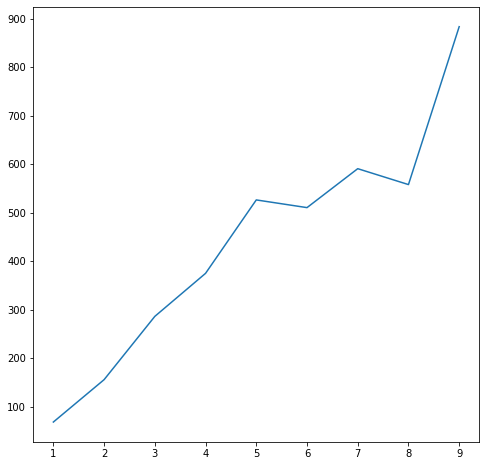

Heuristic algorithm cost VS the size of matrix
For game mode : 1


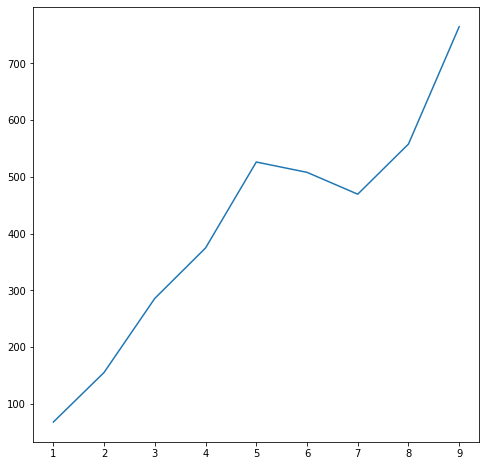

Dijkstra algorithm cost VS the size of matrix
For game mode : 2


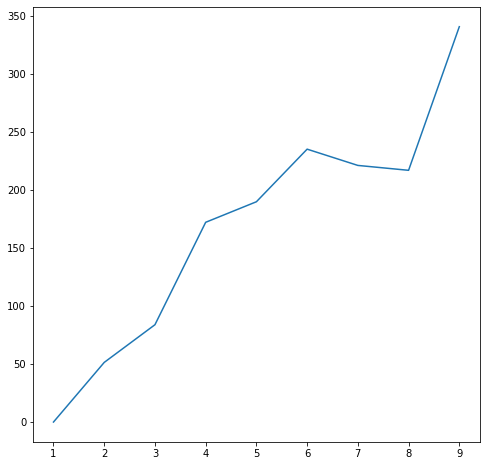

Heuristic algorithm cost VS the size of matrix
For game mode : 2


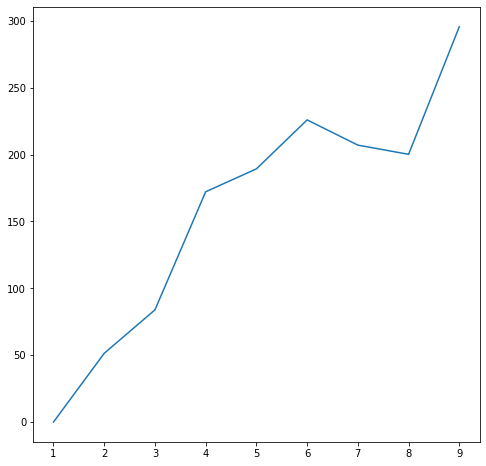

Dijkstra algorithm cost VS the size of matrix


In [7]:
st.costVSsizeofMatrix("uniform",10)

## Normal Distribution

For game mode : 1


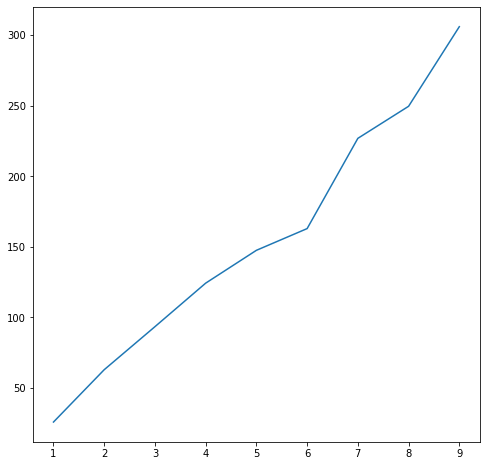

Heuristic algorithm cost VS the size of matrix
For game mode : 1


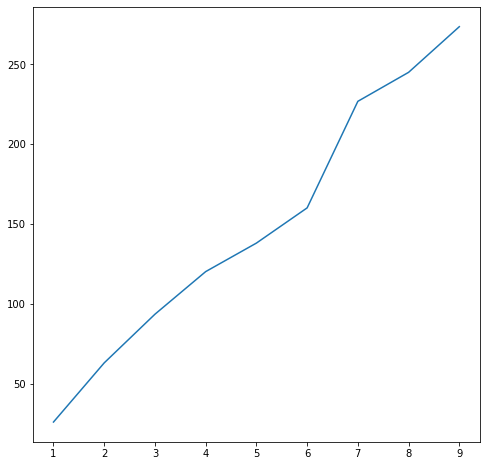

Dijkstra algorithm cost VS the size of matrix
For game mode : 2


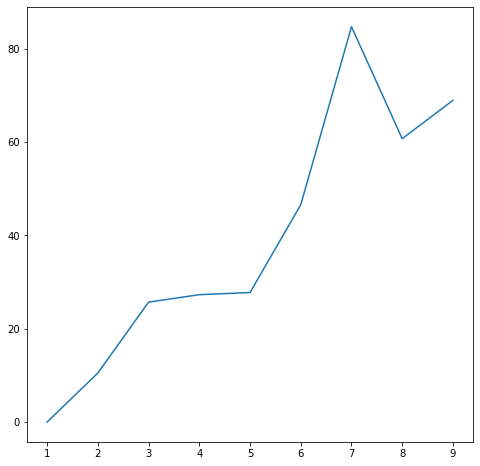

Heuristic algorithm cost VS the size of matrix
For game mode : 2


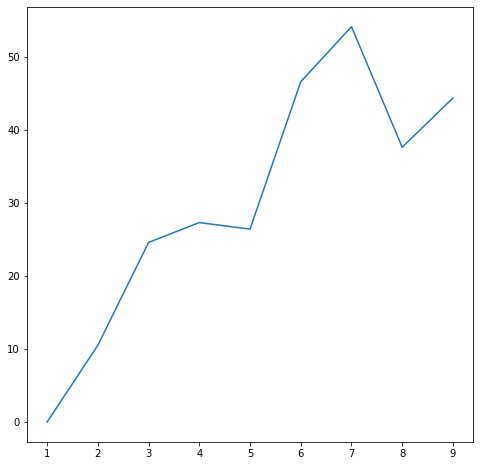

Dijkstra algorithm cost VS the size of matrix


In [8]:
st.costVSsizeofMatrix("normal",10)

## Uniform Distribution

For game mode : 1


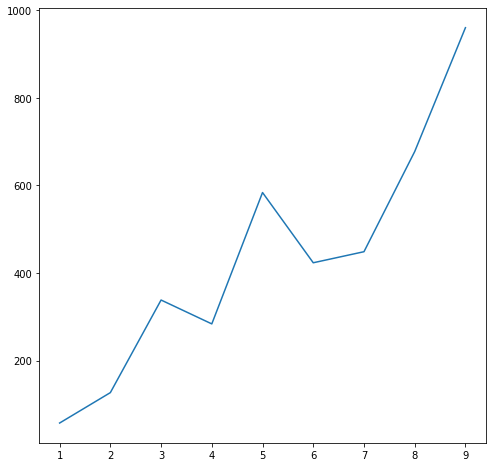

Heuristic algorithm cost VS the size of matrix
For game mode : 1


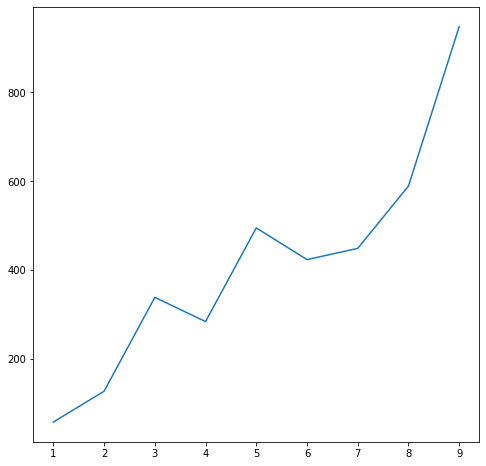

Dijkstra algorithm cost VS the size of matrix
For game mode : 2


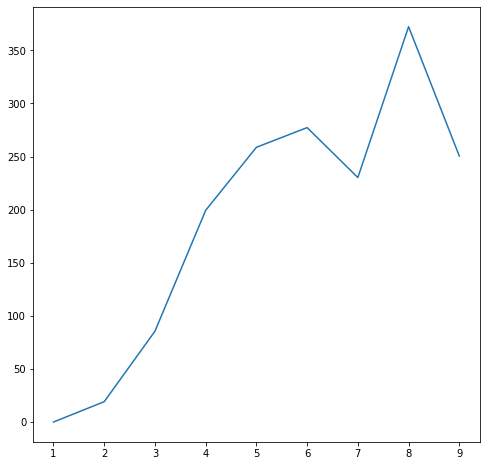

Heuristic algorithm cost VS the size of matrix
For game mode : 2


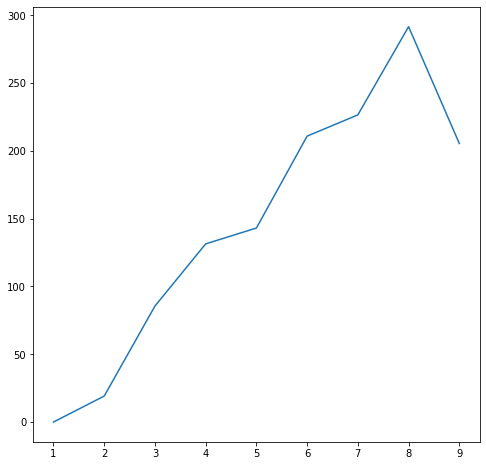

Dijkstra algorithm cost VS the size of matrix


In [9]:
st.costVSsizeofMatrix("uniform",10)

## Gamma Distribution

For game mode : 1


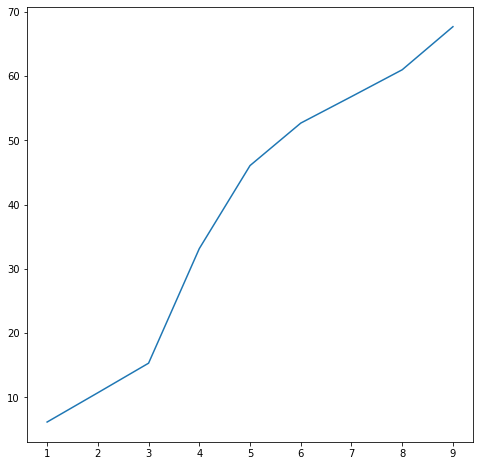

Heuristic algorithm cost VS the size of matrix
For game mode : 1


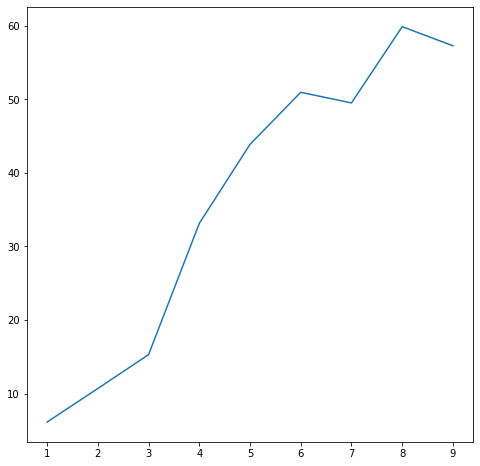

Dijkstra algorithm cost VS the size of matrix
For game mode : 2


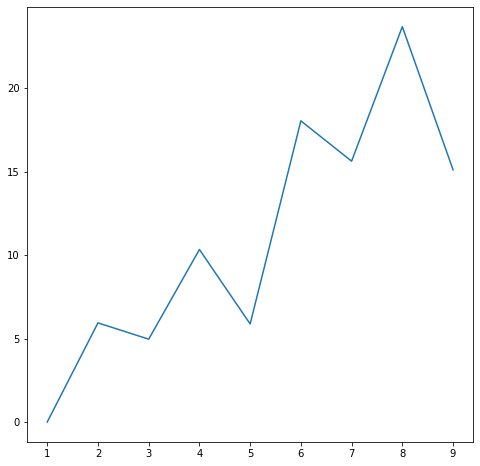

Heuristic algorithm cost VS the size of matrix
For game mode : 2


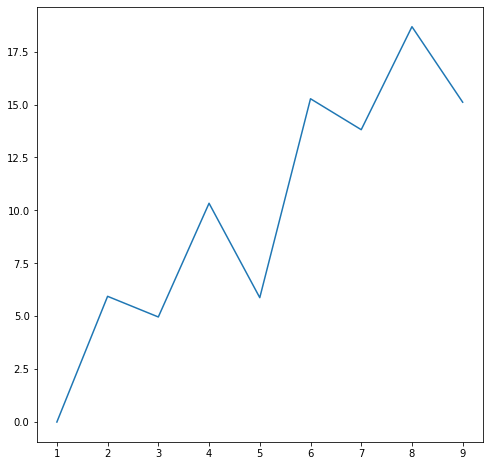

Dijkstra algorithm cost VS the size of matrix


In [18]:
st.costVSsizeofMatrix("gamma",10)

## Poisson Distribution

For game mode : 1


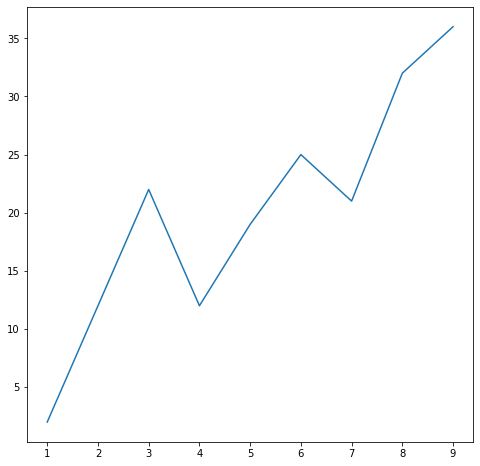

Heuristic algorithm cost VS the size of matrix
For game mode : 1


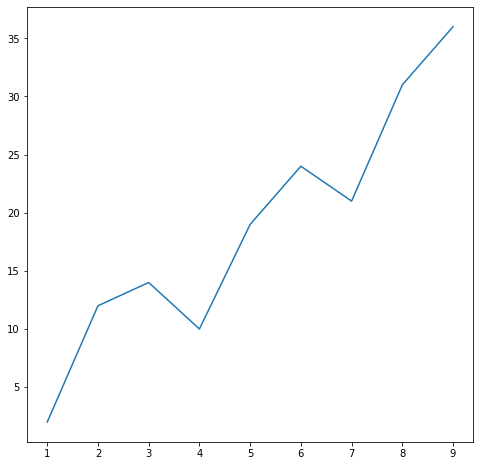

Dijkstra algorithm cost VS the size of matrix
For game mode : 2


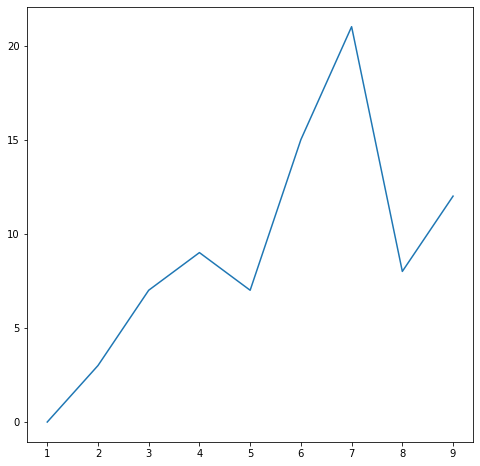

Heuristic algorithm cost VS the size of matrix
For game mode : 2


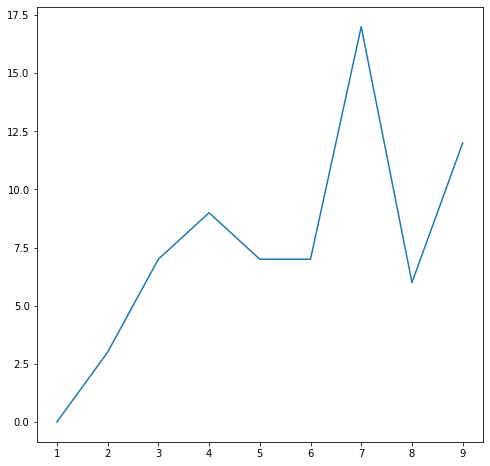

Dijkstra algorithm cost VS the size of matrix


In [19]:
st.costVSsizeofMatrix("poisson",10)

## Exponential Distribution

For game mode : 1


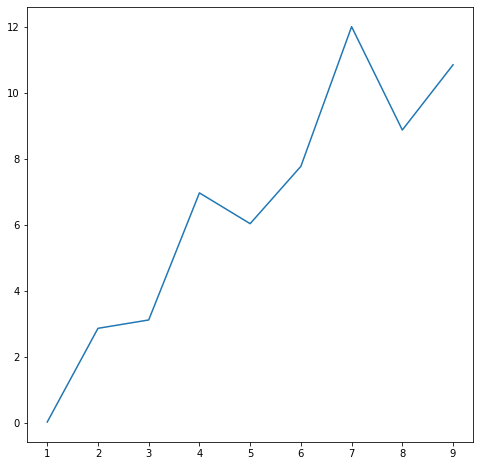

Heuristic algorithm cost VS the size of matrix
For game mode : 1


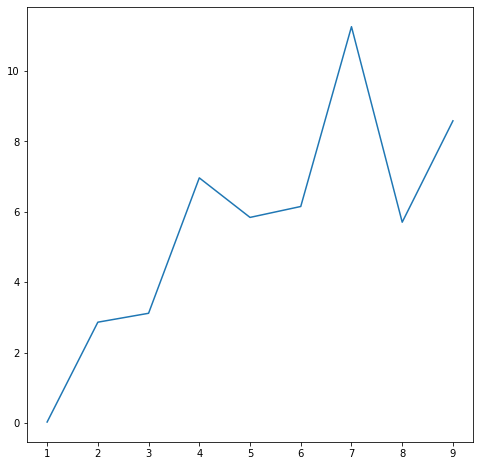

Dijkstra algorithm cost VS the size of matrix
For game mode : 2


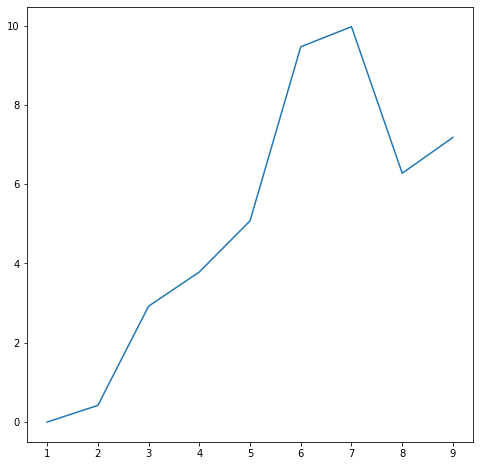

Heuristic algorithm cost VS the size of matrix
For game mode : 2


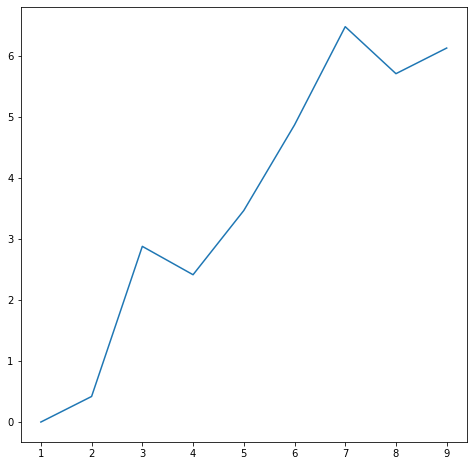

Dijkstra algorithm cost VS the size of matrix


In [20]:
st.costVSsizeofMatrix("exponential",10)

## Binomial Distribution

For game mode : 1


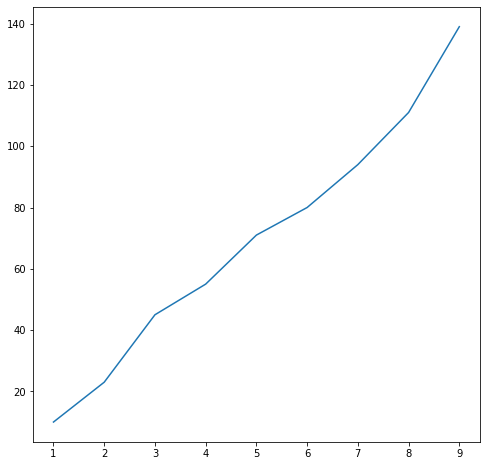

Heuristic algorithm cost VS the size of matrix
For game mode : 1


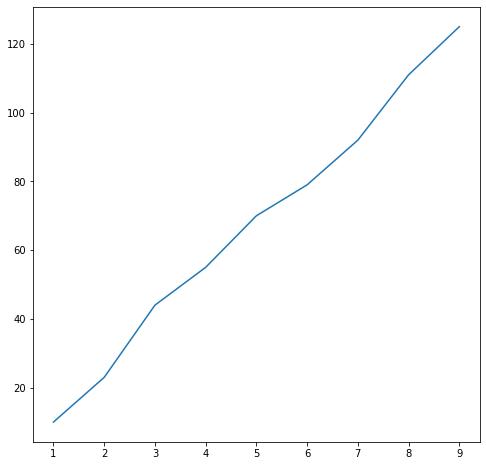

Dijkstra algorithm cost VS the size of matrix
For game mode : 2


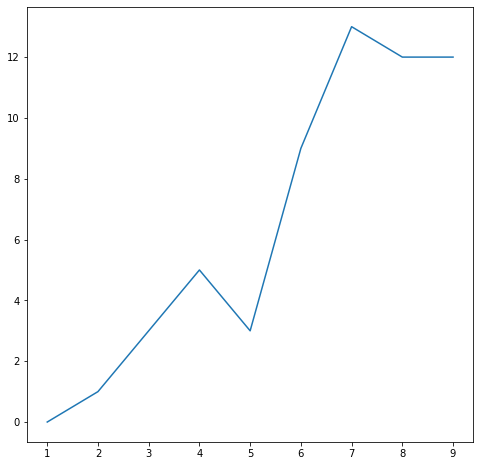

Heuristic algorithm cost VS the size of matrix
For game mode : 2


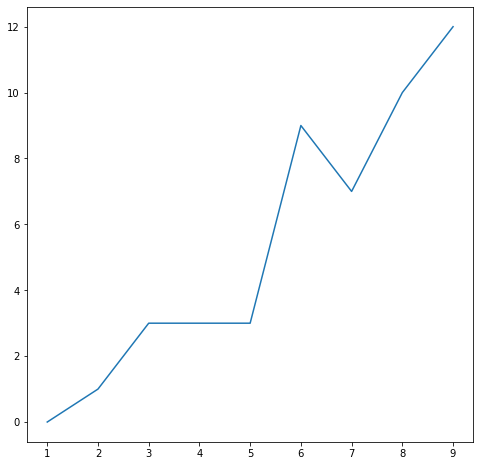

Dijkstra algorithm cost VS the size of matrix


In [24]:
st.costVSsizeofMatrix("binomial",10)

For game mode : 1


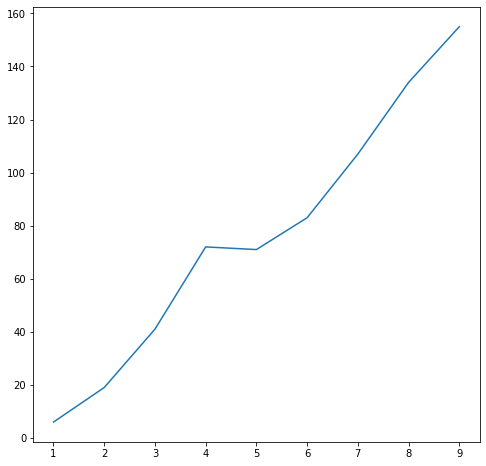

Heuristic algorithm cost VS the size of matrix
For game mode : 1


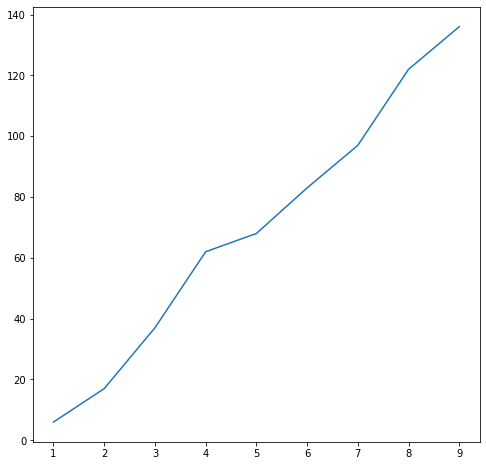

Dijkstra algorithm cost VS the size of matrix
For game mode : 2


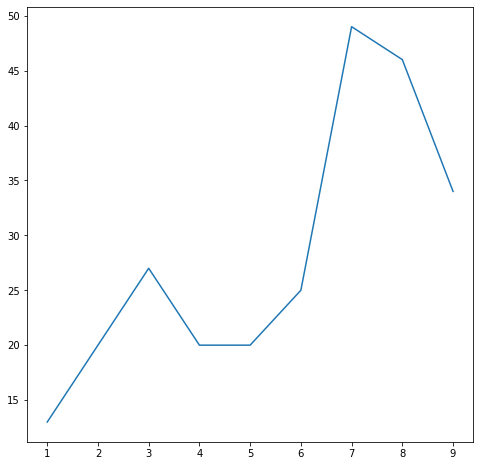

Heuristic algorithm cost VS the size of matrix
For game mode : 2


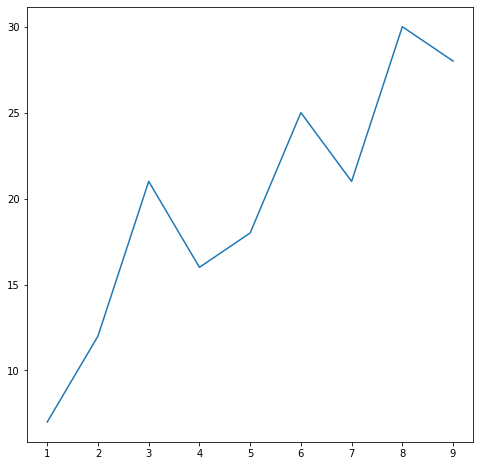

Dijkstra algorithm cost VS the size of matrix


In [28]:
heuristic = Heuristic()
dijkstra = Dijikstra()
costheuristic = [[],[]]
costdijkstra = [[],[]]
for mode in range(2):
    for i in range(1,10):
        data = poisson.rvs(mu=i, size=(10,10))
        ph,ch = heuristic.heuristicpath(data, 10,mode + 1)
        
        #print("heuristic cost = ",ch)

        ps,cd = dijkstra.dijkstrapath(data,10,mode + 1)
        #print("dijkstra cost = ",cd)
        costheuristic[mode].append(ch)
        costdijkstra[mode].append(cd)
    print("For game mode :",mode + 1)
    plt.figure(figsize=(8,8))    
    plt.plot(range(1,10),costheuristic[mode])
    plt.show()
    print("Heuristic algorithm cost VS the size of matrix")
    print("For game mode :",mode + 1)
    plt.figure(figsize=(8,8))    
    plt.plot(range(1,10),costdijkstra[mode])
    plt.show()
    print("Dijkstra algorithm cost VS the size of matrix")

For game mode : 1


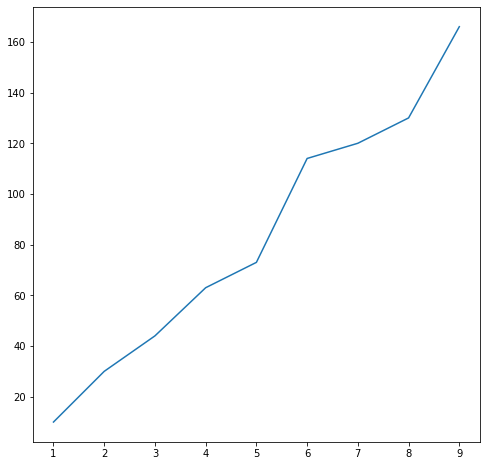

Heuristic algorithm cost VS the size of matrix
For game mode : 1


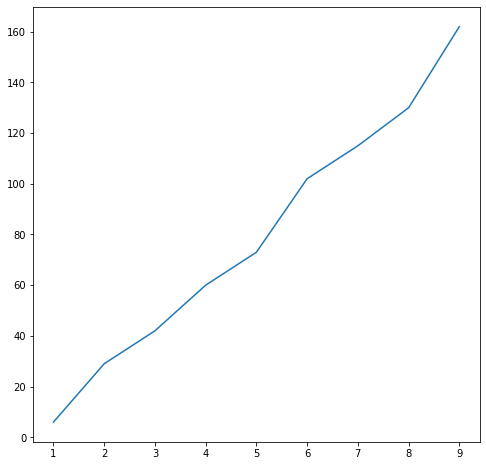

Dijkstra algorithm cost VS the size of matrix
For game mode : 2


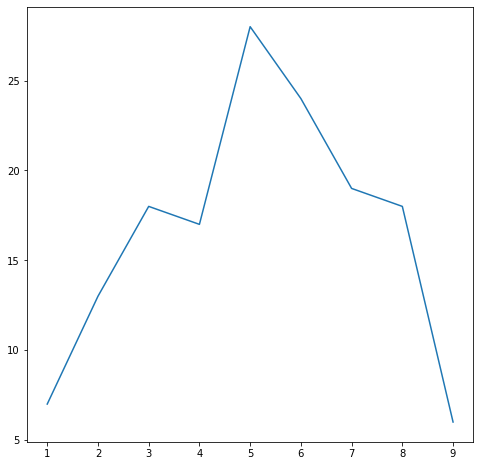

Heuristic algorithm cost VS the size of matrix
For game mode : 2


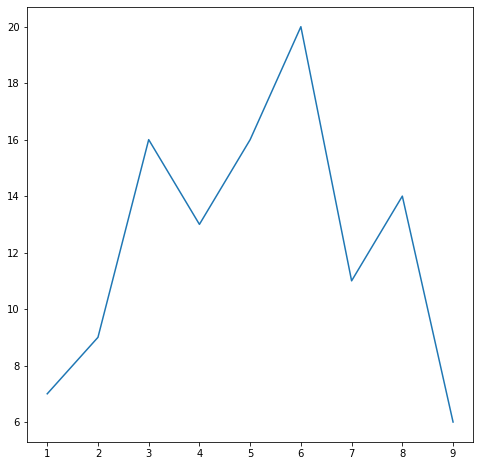

Dijkstra algorithm cost VS the size of matrix


In [30]:
heuristic = Heuristic()
dijkstra = Dijikstra()
costheuristic = [[],[]]
costdijkstra = [[],[]]
for mode in range(2):
    for i in range(1,10):
        data = binom.rvs(n=10,p=i*0.1,size=(10,10))
        ph,ch = heuristic.heuristicpath(data, 10,mode + 1)
        
        #print("heuristic cost = ",ch)

        ps,cd = dijkstra.dijkstrapath(data,10,mode + 1)
        #print("dijkstra cost = ",cd)
        costheuristic[mode].append(ch)
        costdijkstra[mode].append(cd)
    print("For game mode :",mode + 1)
    plt.figure(figsize=(8,8))    
    plt.plot(range(1,10),costheuristic[mode])
    plt.show()
    print("Heuristic algorithm cost VS the size of matrix")
    print("For game mode :",mode + 1)
    plt.figure(figsize=(8,8))    
    plt.plot(range(1,10),costdijkstra[mode])
    plt.show()
    print("Dijkstra algorithm cost VS the size of matrix")